In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
iris=datasets.load_iris()

In [10]:
iris_data=pd.DataFrame(iris.data)

In [8]:
iris_data.columns=iris.feature_names

In [11]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
## Standardization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_scaled=scaler.fit_transform(iris_data)

In [14]:
X_scaled.shape

(150, 4)

In [ ]:
#Apply the PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA(n_components=2)

In [17]:
pca_scaled=pca.fit_transform(X_scaled)

In [18]:
pca

PCA(n_components=2)

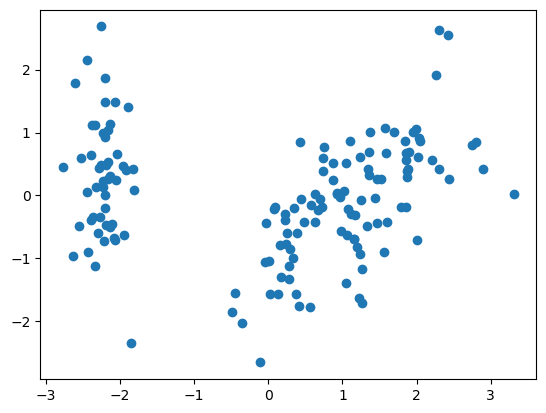

In [19]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, ' Eucledian Distance')

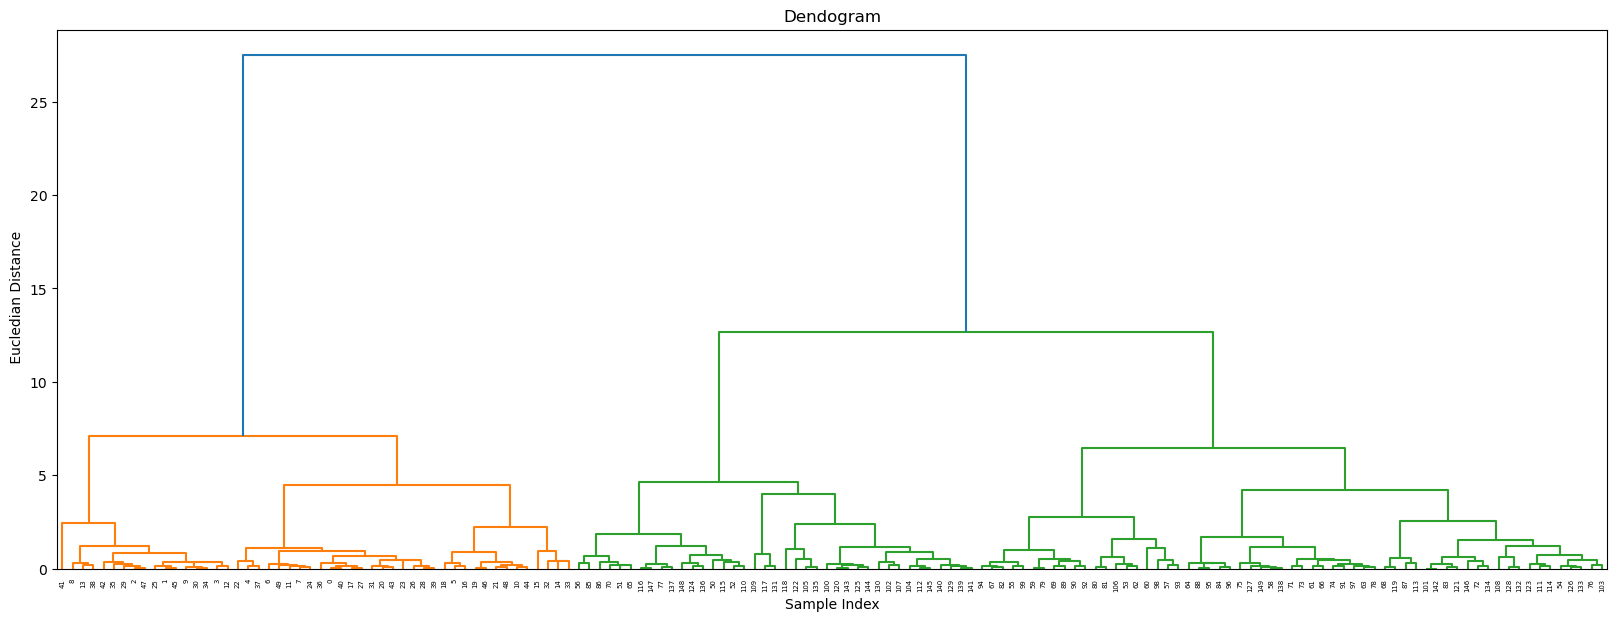

In [21]:
## Agglomerative clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc
## plot the dendogram

plt.figure(figsize=(20,7))
plt.title("Dendograms")
#create dendograms
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel(" Eucledian Distance")

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [25]:
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [26]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

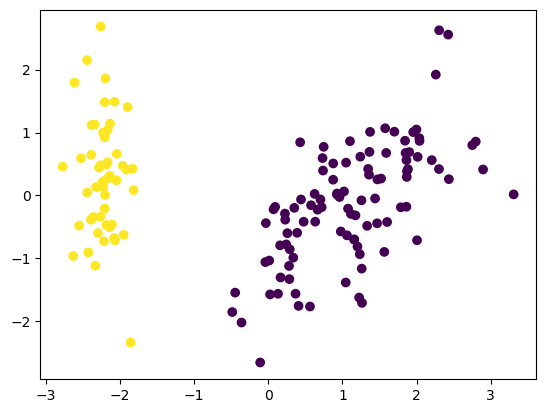

In [27]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [28]:
silhoutte_coefficient=[]

#Notice yoy start at 2 cluster for silhouette coefficent

for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score=silhoutte_coefficient(X_scaled,agglo.labels_)
    silhoutte_coefficient.append(score)

TypeError: 'list' object is not callable